## 📌 Project 1: Classifying Titanic Passengers (Survived or Not)

### 📝 Description:

Can we predict whether a passenger on the Titanic survived based on features like age, sex, and class? This project will use the famous Titanic dataset.

### 📁 Dataset:

You can use the cleaned version of the Titanic dataset from Kaggle or directly load it with `seaborn`.

### 💡 Concepts:

* Binary classification (`Survived` = 0 or 1)
* Preprocessing (drop missing data, encode categorical variables)
* Decision Tree & KNN classifiers
* Accuracy and confusion matrix

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
# 1. Load dataset
df = sns.load_dataset("titanic")
df = df[["pclass", "sex", "age", "fare", "survived"]].dropna()

In [8]:
# 2. Encode categorical column
df["sex"] = LabelEncoder().fit_transform(df["sex"])  # male=1, female=0

In [9]:
# 3. Split features and target
X = df[["pclass", "sex", "age", "fare"]]
y = df["survived"]

In [10]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 5. Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {acc_tree:.2f}")

Decision Tree Accuracy: 0.71


In [12]:
# 6. KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.2f}")

KNN Accuracy: 0.66


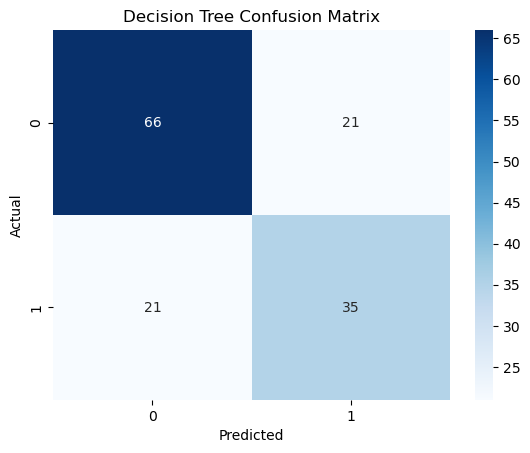

In [13]:
# 7. Confusion Matrix for Decision Tree
conf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🖼️ Visualization: **Decision Tree Confusion Matrix (Titanic Dataset)**

### 📊 What You See:

* A **confusion matrix heatmap** showing the number of correct and incorrect predictions made by the decision tree model.
* Axes:

  * **X-axis (Predicted)**: What the model predicted — whether the passenger survived (`1`) or not (`0`)
  * **Y-axis (Actual)**: The ground truth — whether the passenger actually survived (`1`) or not (`0`)
* **Color intensity**: Indicates how many cases fall into each cell.
* **Numbers inside boxes**: Count of passengers per outcome type.

---

## 🔍 How to Interpret:

### Confusion Matrix Layout:

|                             | Predicted Not Survived (0)                                   | Predicted Survived (1)                                          |
| --------------------------- | ------------------------------------------------------------ | --------------------------------------------------------------- |
| **Actual Not Survived (0)** | **True Negatives (TN)** – model correctly predicted death    | **False Positives (FP)** – model incorrectly predicted survival |
| **Actual Survived (1)**     | **False Negatives (FN)** – model incorrectly predicted death | **True Positives (TP)** – model correctly predicted survival    |

---

### ✅ What You Want to See:

* **High values on the diagonal**:

  * **Top-left (TN)** and **bottom-right (TP)** indicate correct predictions.
* **Low values off-diagonal**:

  * These indicate mistakes (FP or FN).

---

### 📈 Accuracy Score:

* Also printed in the console: e.g.,
  `Decision Tree Accuracy: 0.81`
  means the model predicted correctly 81% of the time on the test set.

---

## 🧠 Example Interpretation:

Imagine this confusion matrix:

```
[[65  8]
 [12 34]]
```

* **65 passengers** who actually died were correctly predicted as dead (TN)
* **8 passengers** were wrongly predicted to survive (FP)
* **12 survivors** were wrongly predicted to die (FN)
* **34 passengers** who survived were correctly predicted (TP)

So:

* The model does fairly well in distinguishing between survivors and non-survivors.
* But there’s room to improve — especially reducing **false negatives** (12 survivors missed).